In [13]:
from glob import glob
import os
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
train_csv_paths = list(glob(os.path.join('.', 'train_*.csv')))
valid_csv_paths = list(glob(os.path.join('.', 'valid_*.csv')))
assert len(train_csv_paths) > 0

In [22]:
df = pd.read_csv(valid_csv_paths[0])

In [23]:
unweighted_sample_cols = [
    str(col) for col in df.columns if 'unweigted_sample_loss' in col
]

In [24]:
epoch_id_col_name = [
    str(col) for col in df.columns if 'epoch_id' in col
][0]
epochs = sorted(list(set(df[epoch_id_col_name])))
epochs

AttributeError: 'DataFrame' object has no attribute 'epoch_id'

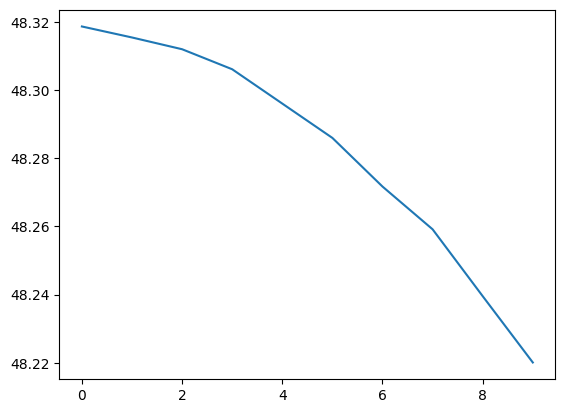

In [19]:
unweighted_losses = []
for i in epochs:
    loss = df.loc[df.epoch_id == i].iloc[:, df.columns.isin(unweighted_sample_cols)].sum(axis=1).mean()
    unweighted_losses.append(loss)
plt.plot(unweighted_losses)

<Figure size 640x480 with 0 Axes>

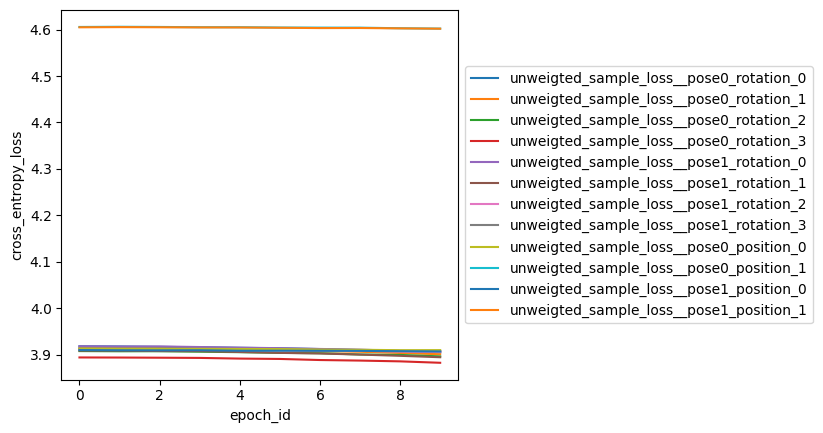

In [20]:
cols = list(df.columns)
rotation_cols = list(col for col in cols if '_rotation_' in col and 'sample_loss' in col)
position_cols = list(col for col in cols if '_position_' in col and 'sample_loss' in col)
fig = plt.figure()
mean_loss = df[rotation_cols + position_cols + ['epoch_id']].groupby('epoch_id').mean()
ax = mean_loss.plot(ylabel='cross_entropy_loss')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [21]:
per_task_loss = df[rotation_cols + position_cols + ['task']].groupby('task').sum().sum(axis=1).sort_values()
per_task_loss / per_task_loss.min()

task
novel_noun                    1.000000
twist                         2.999115
rotate                        2.999257
manipulate_old_neighbor       2.999835
visual_manipulation           3.000048
rearrange                     3.000231
rearrange_then_restore        3.000440
follow_order                  3.000520
sweep_without_exceeding       3.000806
scene_understanding           4.998995
pick_in_order_then_restore    6.002537
dtype: float64